In [38]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Initial check for data quality!
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
# Resample in 15 minute time intervals
logins_df.set_index('login_time', inplace=True)
logins_df['count'] = 1
logins_df = logins_df.resample('15T').sum()

logins_df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


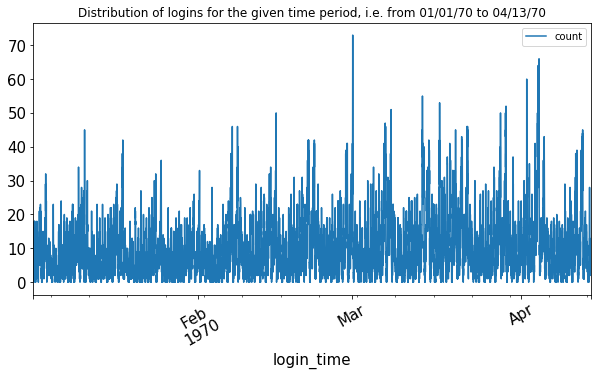

In [26]:

#plot ans see the seasonality and trend if any
logins_df.plot(figsize=(10,5), fontsize=15)
plt.title('Distribution of logins for the given time period, i.e. from 01/01/70 to 04/13/70')
plt.xlabel('login_time', fontsize=15) 
plt.xticks(rotation= 30);

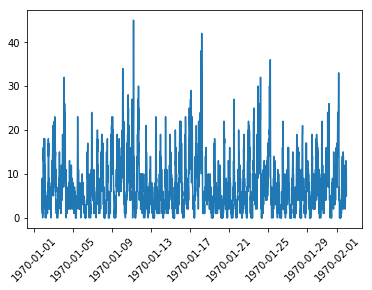

In [24]:
# Plot of January's time series data
plt.plot(logins_df['1970-01-01': '1970-02-01'])
plt.xticks(rotation=45);

In [27]:
# Re-read in the data
logins_df = pd.read_json('logins.json')
logins_df = logins_df.set_index('login_time')
#logins_df.reset_index(drop=False, inplace=True)

# Split by month into new dataframes
jan_df = logins_df['1970-01-01': '1970-01-31']
jan_df.reset_index(drop=False, inplace=True)

feb_df = logins_df['1970-02-01': '1970-02-28']
feb_df.reset_index(drop=False, inplace=True)

mar_df = logins_df['1970-03-01': '1970-03-31']
mar_df.reset_index(drop=False, inplace=True)

apr_df = logins_df['1970-04-01': '1970-04-30']
apr_df.reset_index(drop=False, inplace=True)

# Show example
print('January df sample:\n\n{}'.format(jan_df.head()))

January df sample:

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21


In [28]:
# Create new day of week feature to aggregate on
month_list = [jan_df, feb_df, mar_df, apr_df]

for month_df in month_list:
    month_df['day_of_week'] = month_df['login_time'].map(lambda x: x.weekday())
    
# Show example
print('January df sample:\n\n{}'.format(jan_df.head()))

January df sample:

           login_time  day_of_week
0 1970-01-01 20:13:18            3
1 1970-01-01 20:16:10            3
2 1970-01-01 20:16:37            3
3 1970-01-01 20:16:36            3
4 1970-01-01 20:26:21            3


In [29]:
# Define a function to color each day of the week when plotting
def show_trends(df, title, weekends=False):
    new_df = df.set_index('login_time')

    for day in sorted(list(new_df['day_of_week'].unique())):

        temp = new_df[new_df['day_of_week'] == day]
        temp.drop('day_of_week', axis=1, inplace=True)
        temp['count'] = 1
        temp = temp.resample('15T').sum()
        
        if weekends == True:
            if day in [0,1,2,3,4]:
                color = 'blue'
            else:
                color = 'red'
            plt.plot(temp, color=color)
            plt.title(title)
            plt.xticks(rotation=45)
         
        else:
            plt.plot(temp)
            plt.title(title)
            plt.xticks(rotation=45)

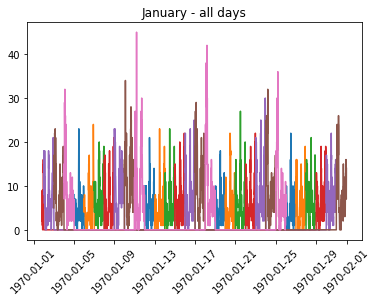

In [30]:
show_trends(jan_df, title='January - all days')

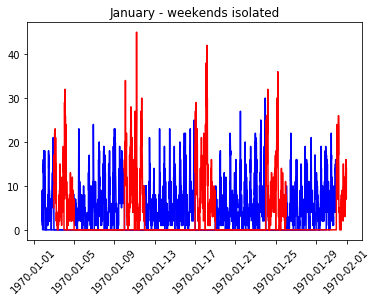

In [31]:

show_trends(jan_df, title='January - weekends isolated', weekends=True)

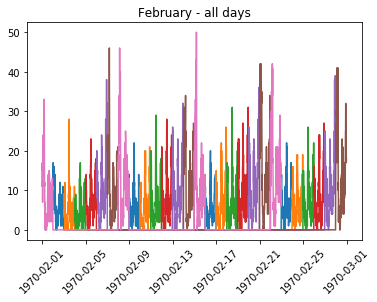

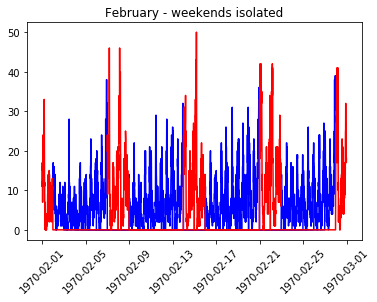

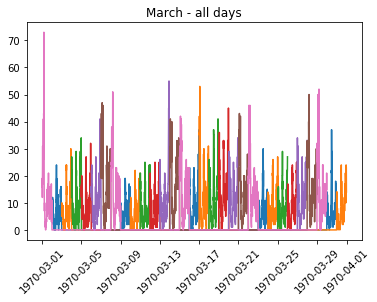

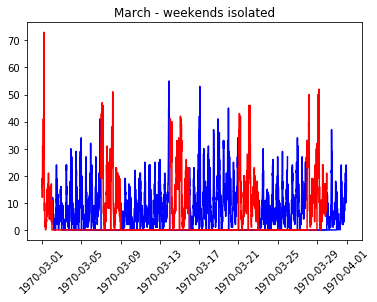

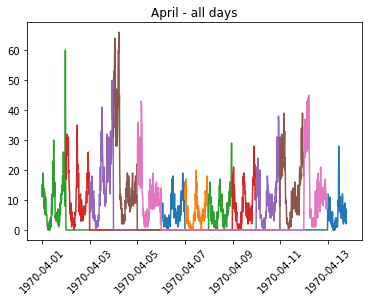

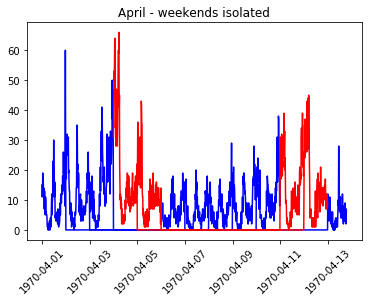

In [32]:
count = 0
month_names = ['February', 'March', 'April']

for month in month_list[1:]:
    title = month_names[count] + ' - all days'
    show_trends(month, title=title)
    plt.show();
    
    title = month_names[count] + ' - weekends isolated'
    show_trends(month, title=title, weekends=True)
    plt.show();
    
    count += 1

In [36]:
print("Findings:- The above charts show a clear pattern of the demand. There are two broad categories of demand patterns:1. Weekend pattern, i.e. Friday evening through Sunday midnight, 2. Weekday patter, i.e. the rest of the day / time. We see that the trends in January, February, March, and April are the same. It is worth noticing two other things: 1) We do not have all of April's data, which is why we only see two weekends represented and a more drawn out plot, and 2) all graph's y-axes are not on the same scale. We have to keep in mind this fact to determine that some months may have higher rates of activity than others.")

Findings:- The above charts show a clear pattern of the demand. There are two broad categories of demand patterns:1. Weekend pattern, i.e. Friday evening through Sunday midnight, 2. Weekday patter, i.e. the rest of the day / time. We see that the trends in January, February, March, and April are the same. It is worth noticing two other things: 1) We do not have all of April's data, which is why we only see two weekends represented and a more drawn out plot, and 2) all graph's y-axes are not on the same scale. We have to keep in mind this fact to determine that some months may have higher rates of activity than others.
